# Pymaceuticals Inc.
---

### Analysis

 In this section, we calculate the correlation coefficient and perform a linear regression analysis between the mouse weight and the average tumor volume for mice treated with the Capomulin regimen. The correlation coefficient will help us understand the strength and direction of the relationship between these two variables. A positive correlation would suggest that as the mouse weight increases, the tumor volume also increases.

 We will then use linear regression to establish a model that predicts the tumor volume based on the mouse's weight. This model will be visualized with a regression line plotted over the scatter plot of the data points, providing a visual representation of the relationship.

 This analysis can be used for determining whether weight could be considered a significant factor in the effectiveness of the Capomulin treatment on tumor volume reduction.



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
display(combined_data.head())


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
print("Total mice:", combined_data['Mouse ID'].nunique())

Total mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate entries:", duplicate_mice)

Duplicate entries:      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
print(duplicate_mouse_data)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice['Mouse ID'])]

In [7]:
# Checking the number of mice in the clean DataFrame.
print("Total mice in clean data:", clean_data['Mouse ID'].nunique())

Total mice in clean data: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
means = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_devs = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Std. Dev.": std_devs,
    "Tumor Volume SEM": sems
})

# Display the summary statistics table
display(summary_statistics)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)

# Display the advanced summary statistics table
display(summary_stats_advanced)

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

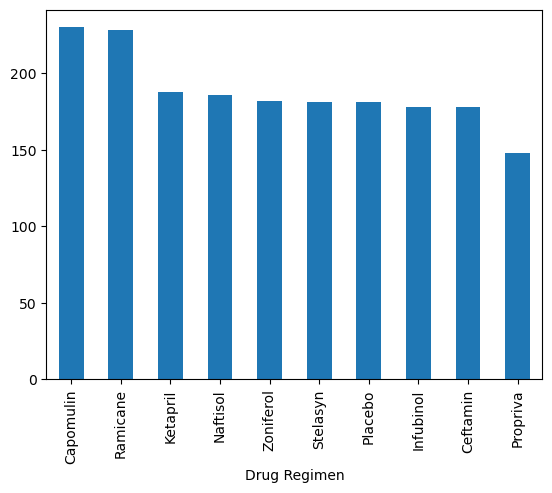

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_data['Drug Regimen'].value_counts().plot(kind='bar')

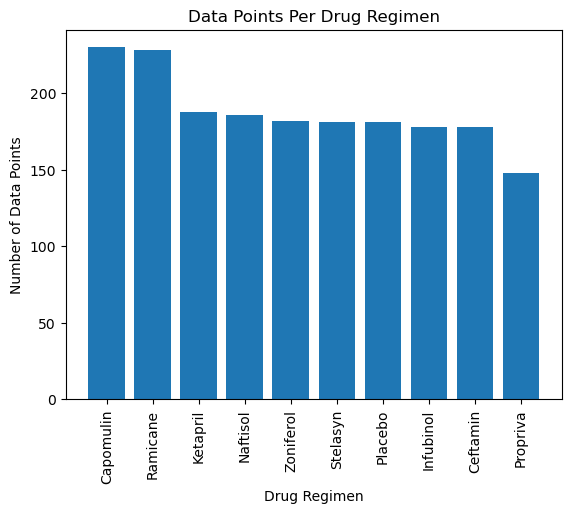

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure()
plt.bar(clean_data['Drug Regimen'].value_counts().index, clean_data['Drug Regimen'].value_counts().values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Data Points Per Drug Regimen')
plt.xticks(rotation=90)
plt.show()

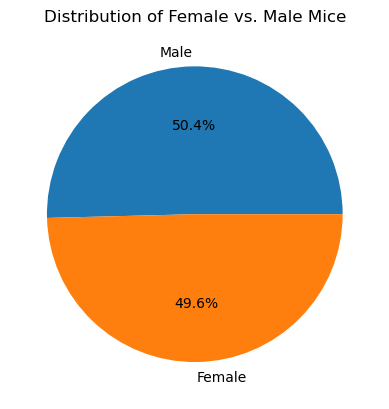

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates('Mouse ID')['Sex'].value_counts()

# Make the pie chart
unique_mice_gender.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs. Male Mice')
plt.ylabel('')  # Removes the Sex label on the side for cleaner presentation
plt.show()

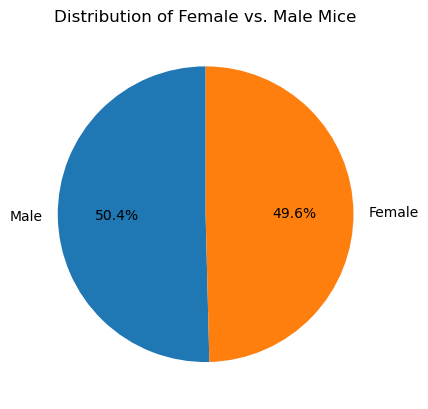

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates('Mouse ID')['Sex'].value_counts()

# Make the pie chart
plt.pie(unique_mice_gender, labels=unique_mice_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs. Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_data = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Loop through each treatment and calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_volume_data[final_volume_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset to the tumor_vol_list for plotting later
    tumor_vol_list.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"Outliers for {treatment}: {outliers}")

Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


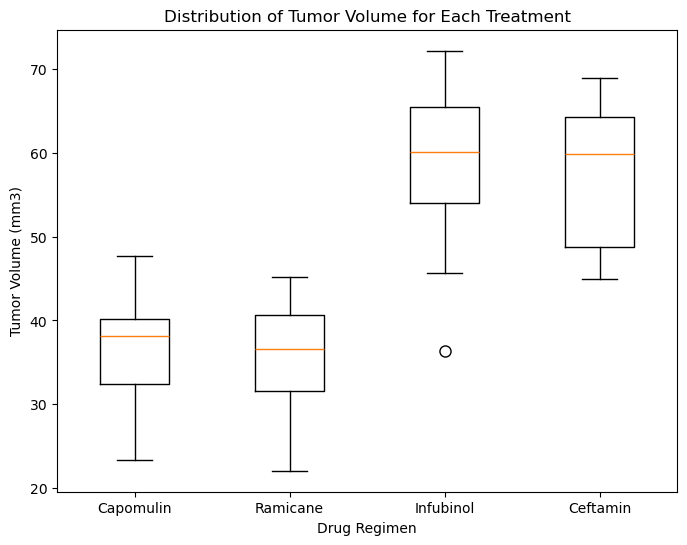

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8,6))
plt.boxplot(tumor_vol_list, labels=treatments, flierprops=dict(marker='o', color='red', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

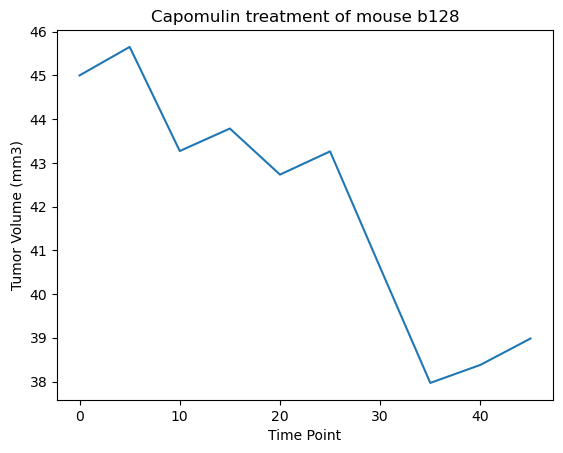

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == capomulin_data['Mouse ID'].iloc[0]]

# Plotting the data
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse ' + mouse_data['Mouse ID'].iloc[0])
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

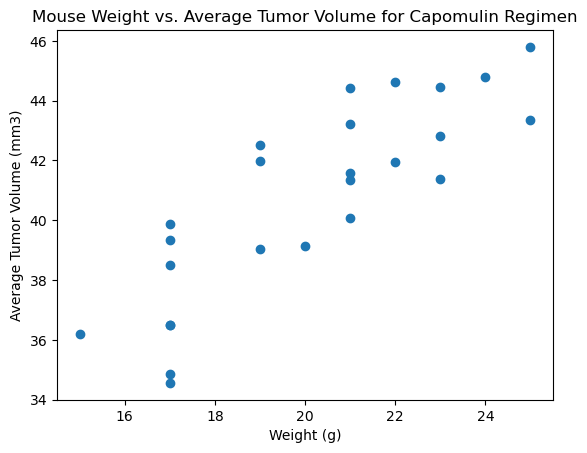

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group data by Mouse ID for Capomulin regimen and calculate the average tumor volume
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Plotting the data
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation coefficient: 0.84


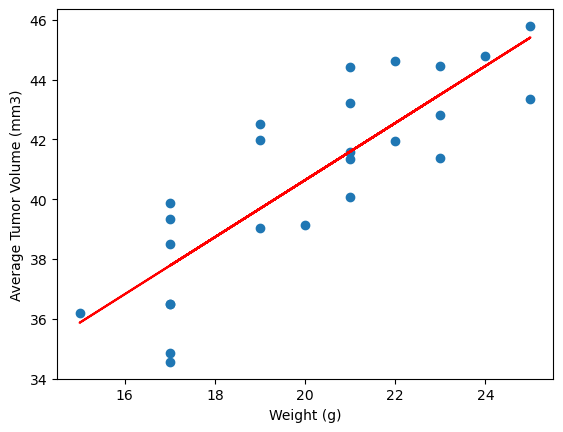

In [24]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation[0]:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Use the linear regression equation to calculate the y-values
regression_values = average_tumor_volume['Weight (g)'] * slope + intercept

# Plotting
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.plot(average_tumor_volume['Weight (g)'], regression_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()